In [1]:
from satellite_reentry import load_satevo
with open("../data/dec30.txt") as f:
    df = load_satevo(f)
df

,apogee,perigee
date,,
2024-12-30 02:38:57.027264,279.0,267.0
2024-12-30 04:08:59.076672,279.0,267.0
2024-12-30 05:39:00.524736,278.0,267.0
2024-12-30 07:09:01.366272,278.0,266.0
2024-12-30 08:39:01.596096,277.0,266.0
...,...,...
2025-01-04 21:07:25.901760,173.0,169.0
2025-01-04 22:35:21.427008,168.0,164.0
2025-01-05 00:03:10.576800,162.0,159.0


In [ ]:
import datetime as dt
def tle_to_dt(tle_date: str) -> dt.datetime:
    year = int(tle_date[:2]) + 2000
    day = float(tle_date[2:])
    return dt.datetime(year, 1, 1) + dt.timedelta(days=day - 1)

tle_to_dt("24365.11038226")

datetime.datetime(2024, 12, 30, 2, 38, 57, 27264)

In [31]:
data = [
    {
        "apogee": float(obs[0][1]),
        "perigee": float(obs[0][3]),
        "date": tle_to_dt(obs[1][3])
    } for obs in observations
]

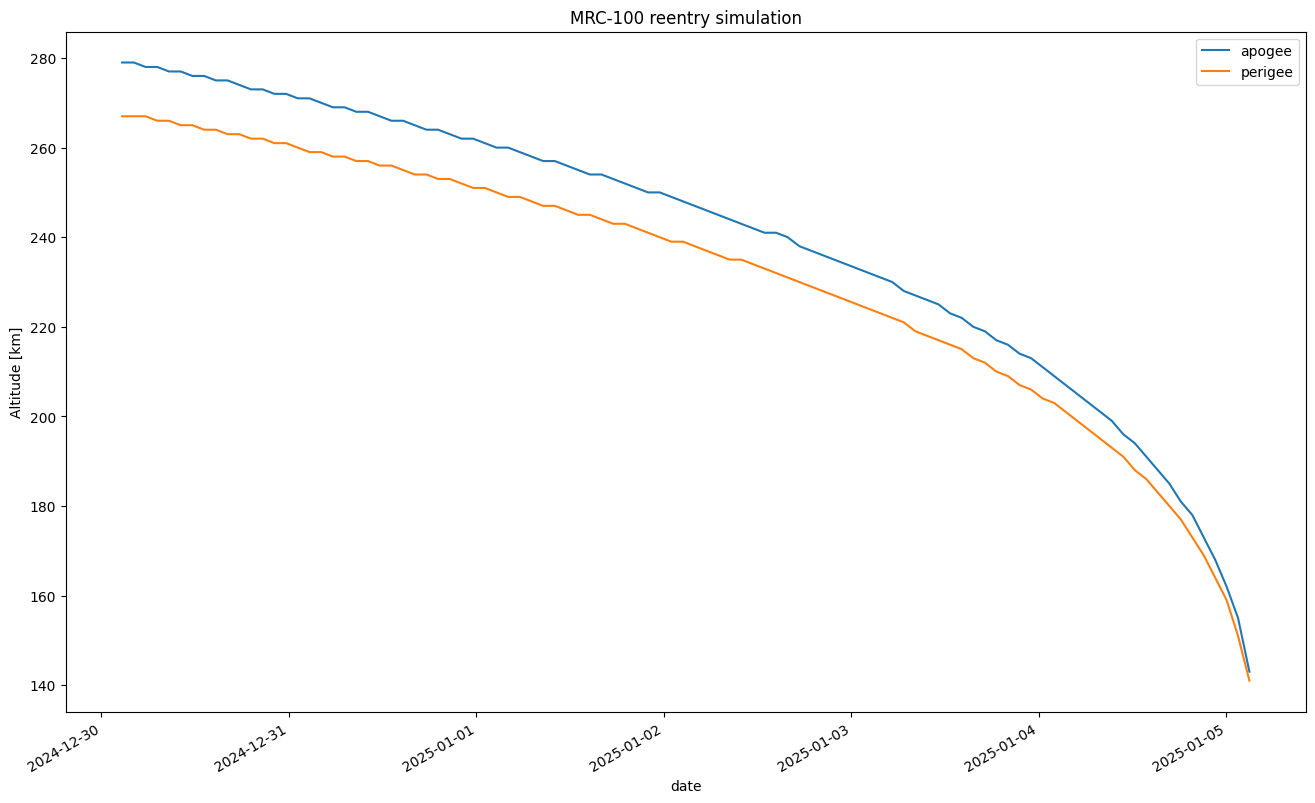

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(data)
df = df.set_index("date", drop=True)
axes = df.plot(figsize=(16, 10))
axes.set_title("MRC-100 reentry simulation")
axes.set_ylabel("Altitude [km]")
plt.savefig("../data/mrc-100.png")

In [30]:
max(df.index)

Timestamp('2025-01-05 02:58:22.433664')

In [41]:
df["perigee"].min()

141.0